[[63 14]
 [23  9]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        77
           1       0.39      0.28      0.33        32

    accuracy                           0.66       109
   macro avg       0.56      0.55      0.55       109
weighted avg       0.63      0.66      0.64       109



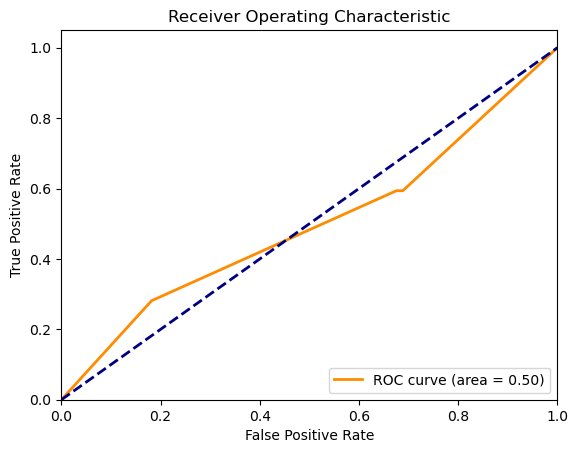

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


data = pd.read_csv('/Users/mehtap/Downloads/PCOS_data.csv')

X = data.iloc[:, 3:-1] 
y = data['PCOS (Y/N)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)


y_scores = dt_classifier.predict_proba(X_test)[:, 1]  


fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
